<a href="https://colab.research.google.com/github/JMcoyRo/Advanced-Deep-Learning-with-R/blob/master/Trabajo_acad%C3%A9mico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # <center> **Maestría en Ciencia de datos** </center>
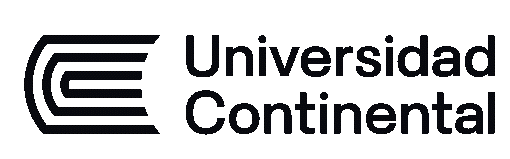

## <center> **Limpieza y manipulación de datos** </center>

## <center> House Prices - Advanced Regression Techniques Predict sales prices and practice feature engineering, RFs, and gradient boosting </center>

## Integrantes



*    Iván Velásquez Quintanilla

*    Jackson Romero Plasencia

*  Jeronimo Canahuiri Ayerbe




### Índice
>
* [Resumen](#resumen)
     * [Objetivos](#obje)
     * [Palabras clave](#clave)
     
     
* [Abstract](#abstract)
   * [Key words](#key)
   
* [Introducción](#intro)
* [Metodología](#meto)
* [Resultados](#resul)
* [Discusión](#discu)

* [Contribuciones de los autores](#con)
    indicar la contribución de cada autor.
* [Fuentes de financiamiento](#fin)
     autofinanciado.
* [Conflictos de interés](#conf)
  los autores declaran no tener conflictos de interés en la publicación del artículo.
 * [Agradecimientos](#agra)
 indicar los principales.


### **Resumen**

[Índice](#Índice)


<p style="text-align: justify;"> En una de las competencias realizadas en [Kaggle](https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf) sobre la predicción  de precios de  vivienda, haciendo uso de  técnicas avanzadas de regresión.  <p>
&nbsp;
  <p style="text-align: justify;"> Se solicita a un comprador que describa la casa de sus sueños y probablemente no comenzará con la altura del techo del sótano o la proximidad a una vía de ferrocarril de este a oeste. Pero el conjunto de datos de esta competición de parques infantiles demuestra que en las negociaciones de precios influye mucho más que el número de dormitorios o una valla blanca.  <p>
&nbsp;
 <p style="text-align: justify;"> La base de datos consta 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada vivienda.  <p>
&nbsp;
 <p style="text-align: justify;"> El conjunto de datos de Ames Housing  fue compilado por Dean De Cock para su uso en la educación en ciencia de datos. Es una alternativa increíble para los científicos de datos que buscan una versión modernizada y ampliada del conjunto de datos de Boston Housing, frecuentemente citado.  <p>
&nbsp;

 <p style="text-align: justify;">Las estimaciones se evalúan según el error cuadrático medio (RMSE)  entre el logaritmo del valor previsto y el logaritmo del precio de venta observado. <p>




### **Objetivos**


* <p style="text-align: justify;"> Realizar imputación de datos perdidos  
  <p>
* <p style="text-align: justify;">Predecir el precio de venta de cada casa <p>
* <p style="text-align: justify;"> Aplicar Técnicas de regresión avanzadas como Random Forest y Gradient Boosting
 <p>


### **Palabras clave**

#### Randon Forest, Gradient Boosting, imputación

# **Abstract**

<p style="text-align: justify;">In one of the competitions held on [Kaggle](https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf) on house price prediction, using advanced regression techniques .<p>



<p style="text-align: justify;"> A buyer is asked to describe their dream home, and they probably won't start with the height of the basement ceiling or the proximity to an east-west railroad track. But the data set from this playground competition shows that much more influences price negotiations than the number of bedrooms or a white picket fence.<p>
&nbsp;
<p style="text-align: justify;">The database consists of 79 explanatory variables that describe (almost) every aspect of residential housing in Ames, Iowa, this competition challenges you to predict the final price of each home.<p>
&nbsp;
<p style="text-align: justify;">The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the oft-cited Boston Housing dataset.<p>
&nbsp;
<p style="text-align: justify;"> Estimates are evaluated based on the root mean square error (RMSE) between the log of the predicted value and the log of the observed sales price.<p>

### **Keywords**


Randon Forest, Gradient Boosting, imputation

# **Introducción**

# **Metodología**

>
*  Para este proyecto, se va a emplear técnicas de regresión avanzadas, específicamente Random Forest, Gradient Boosting y un modelo de Regresión, para predecir el precio de venta de las casas.

* Se va a segmentar el conjunto de datos en  entrenamiento y prueba, posteriormente se va hacer análisis de datos exploratorio. Esta base de datos cuenta con missing values, es decir, debemos realizar imputación de datos.


# **Resultados**

In [4]:
#cargando librerías
import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, cross_val_score


from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


!pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
#primero datos de train y su estructura
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


como se puede obervar, hay variables  con datos perdidos

In [6]:
# missing values or NULL values
#Open link to Jupyter Notebook to view output
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
test_df.info()
test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

Hay muchas variables con valores perdidos, a continuación realizaremos unas gráfica de los valores perdidos

### Analizando los datos perdidos para train_df

In [8]:
def remodf(df, ratio=0.65):
  for i in df.columns:
    if df[i].isnull().mean()>ratio:
       df.drop(i, axis=1, inplace=True)

<Axes: >

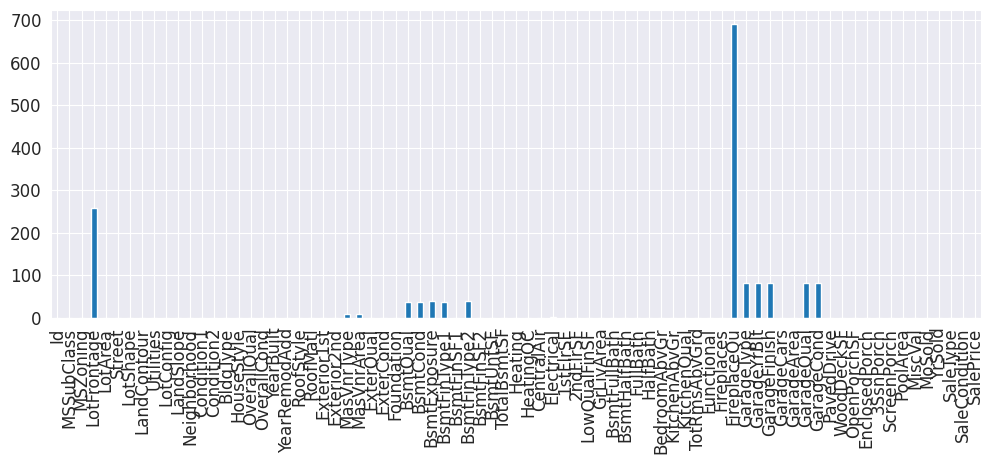

In [9]:
remodf(train_df)
data_2=train_df.copy()
train_df.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12,4) )


<p style="text-align: justify;"> A partir de la figura, podemos observar que: LotFrontage y LotFrontage son las dos variables con mayor cantidad de datos perdidos. <p>

### Analizando los datos perdidos para test_df

<Axes: >

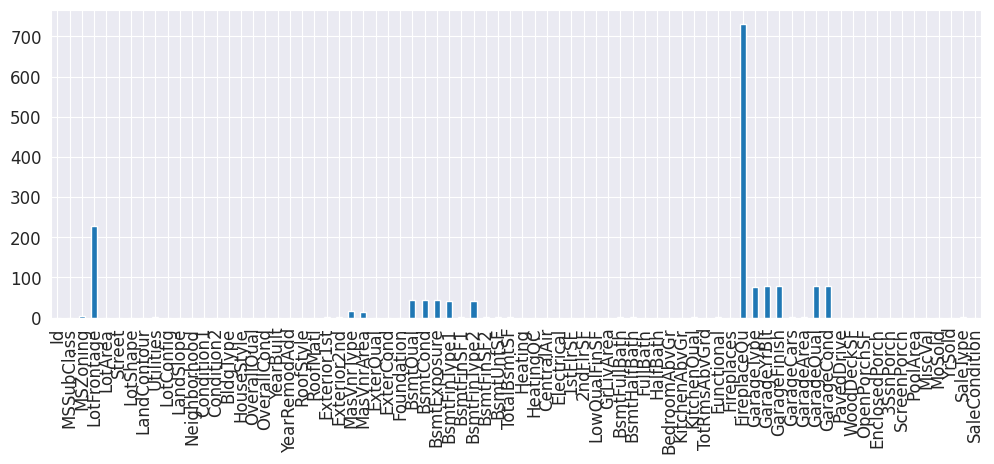

In [10]:
remodf(test_df)
data_2=test_df.copy()
test_df.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12,4) )


### Combinamos data.train y data.test

In [11]:
target = train_df['SalePrice']
test_ids = test_df['Id']

train1 = train_df.drop(['Id', 'SalePrice'], axis=1)
test1 = test_df.drop('Id', axis=1)

data = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


### Imputación



In [12]:

target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Limpieza

In [13]:
data1 = data.copy()
data1['MSSubClass'] = data1['MSSubClass'].astype(str)

### Imputación

In [14]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [15]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data1 = knn_impute(data1, column)

In [16]:
data2 = data1.copy()

In [18]:
data2["SqFtPerRoom"] = data2["GrLivArea"] / (data2["TotRmsAbvGrd"] +
                                                       data2["FullBath"] +
                                                       data2["HalfBath"] +
                                                       data2["KitchenAbvGr"])

data2['Total_Home_Quality'] = data2['OverallQual'] + data2['OverallCond']

data2['Total_Bathrooms'] = (data2['FullBath'] + (0.5 * data2['HalfBath']) +
                               data2['BsmtFullBath'] + (0.5 * data2['BsmtHalfBath']))

data2["HighQualSF"] = data2["1stFlrSF"] + data2["2ndFlrSF"]

In [20]:
data3=data2.copy()

### Trabajando conm la variable tarjet: SalePrice

In [21]:
skew_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data3[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [24]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data3[column] = np.log1p(data3[column])
data3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,60,RL,0.973301,1.195975,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.000000,2,2008,WD,Normal,1.024655,0.820286,3.5,1.142168
1,20,RL,0.987819,1.199786,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.000000,5,2007,WD,Normal,1.023690,0.837467,2.5,1.130416
2,60,RL,0.976519,1.204436,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.000000,9,2008,WD,Normal,1.037819,0.820286,3.5,1.143805
3,70,RL,0.967505,1.199631,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.000000,2,2006,WD,Abnorml,1.041546,0.820286,2.0,1.142322
4,60,RL,0.991126,1.211219,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.000000,12,2008,WD,Normal,1.034683,0.829305,3.5,1.151469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,0.879129,1.146811,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.000000,6,2006,WD,Normal,1.022073,0.810237,1.5,1.124614
2915,160,RM,0.879129,1.145997,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.000000,4,2006,WD,Abnorml,1.014876,0.786048,1.5,1.124614
2916,20,RL,1.031488,1.220561,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.000000,9,2006,WD,Abnorml,1.021851,0.820286,2.0,1.129201
2917,85,RL,0.969893,1.202260,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.105879,7,2006,WD,Normal,1.014833,0.798928,1.5,1.119759


### Codificando categorías de las variables categóricas

In [25]:
data4=data3.copy()
data4 = pd.get_dummies(data4)


### Escalar variables

In [27]:
data5=data4.copy()
scaler = StandardScaler()
scaler.fit(data5)

data5 = pd.DataFrame(scaler.transform(data5), index=data5.index, columns=data5.columns)

In [129]:
data5

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


<ipython-input-30-f2e9634b9c30>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
<ipython-input-30-f2e9634b9c30>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)


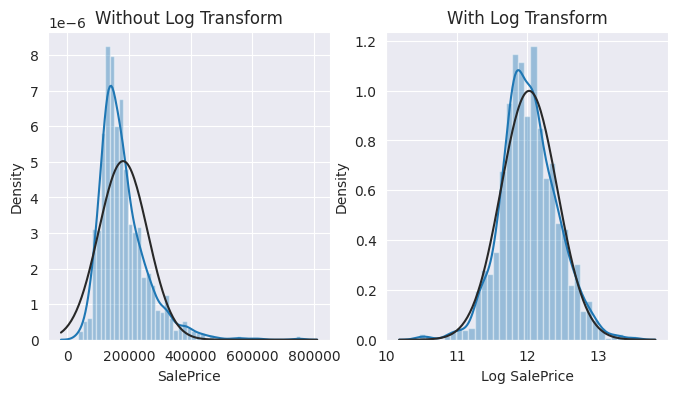

In [30]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Split data

In [130]:
train_final = data5.loc[:train_df.index.max(), :].copy()
test_final = data5.loc[train_df.index.max() + 1:, :].reset_index(drop=True).copy()

In [131]:
train_final.head(10)
test_final.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
5,0.349325,0.226611,-0.063185,-0.435439,0.716427,0.466021,-0.804554,-1.418196,-0.363076,0.541818,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
6,-0.136107,-0.215962,-0.063185,1.226101,0.683917,1.088305,-0.804554,0.877373,-0.363076,-0.092224,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
7,-0.154368,-0.114892,-0.063185,-0.435439,0.878733,0.657493,-0.804554,-1.418196,-0.363076,0.559750,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
8,0.711638,0.260831,0.646183,-0.435439,0.618848,0.274548,-0.804554,0.748772,-0.363076,0.466646,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
9,0.149860,-0.115359,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.826785,1.962439,-3.015455,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
